## Excercise - AAC data

**Task:** 
Visualize the images of AAC (All-sky Airglow Camera) data

**Steps:**
- import libraries
- load data (.fits format) and process them
- plot data (keep in mind qualities of good data visualization)

**Bonus:**
- play with ranges to catch the airglow variability
- create histograms for each filter and compare them
- create a movie of 3 consecutive images in the same filter

In [1]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from dateutil.parser import parse
from astropy.visualization import astropy_mpl_style
from astropy.io import fits

In [2]:
## load data and process them

# load data to astropy header and numpy array
aac_file = 'https://www.dropbox.com/s/gqpsfg6iu0cw6as/aac-20200521-213042.fits?dl=1'
# there are data for 4 filters in fits file. Let's plot the last one - IR (infra-red)
image_hdr3 = fits.getheader(aac_file, 3)
image_data3 = fits.getdata(aac_file, 3)

# improve the date and time format for the name of image
parsed_time = parse(image_hdr3['DATE-OBS'], fuzzy=True)
str_time = parsed_time.strftime("%Y-%m-%d_%H-%M-%S")

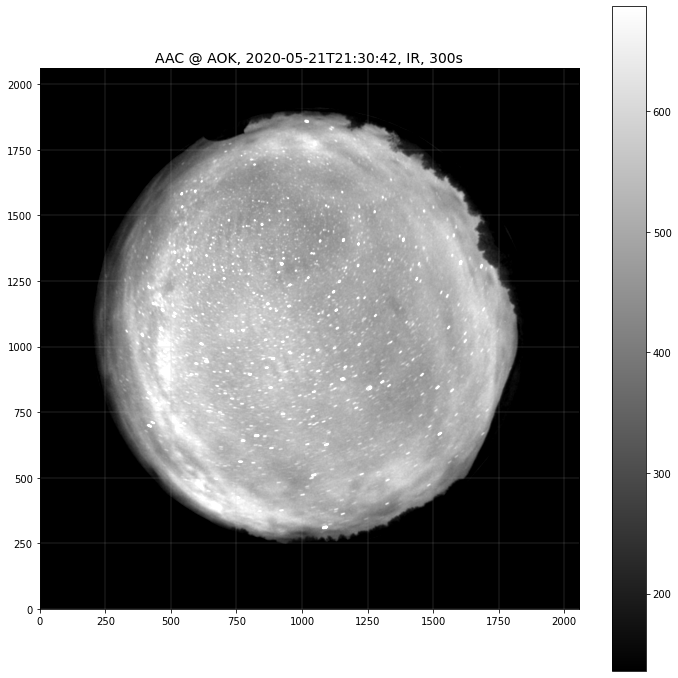

In [3]:
## plot data

plt.figure(figsize=(10, 10))
plt.title('AAC @ AOK, ' + image_hdr3['DATE-OBS'] + ', ' + image_hdr3['FILTER']
          + ', ' + str(image_hdr3['EXPTIME']) + 's', fontsize=14)
plt.imshow(image_data3, cmap='gray', vmin=np.percentile(image_data3, 50), vmax=np.percentile(image_data3, 99),
            interpolation="bicubic", origin='lower')
plt.tight_layout()
#plt.xticks([])
#plt.yticks([])
plt.grid(linewidth=0.2)
plt.colorbar()
plt.show()

In [4]:
## BONUS:

# write your code here